In [ ]:
%matplotlib inline


# GMM covariances

Demonstration of several covariances types for Gaussian mixture models.

See `gmm` for more information on the estimator.

Although GMM are often used for clustering, we can compare the obtained
clusters with the actual classes from the dataset. We initialize the means
of the Gaussians with the means of the classes from the training set to make
this comparison valid.

We plot predicted labels on both training and held out test data using a
variety of GMM covariance types on the iris dataset.
We compare GMMs with spherical, diagonal, full, and tied covariance
matrices in increasing order of performance. Although one would
expect full covariance to perform best in general, it is prone to
overfitting on small datasets and does not generalize well to held out
test data.

On the plots, train data is shown as dots, while test data is shown as
crosses. The iris dataset is four-dimensional. Only the first two
dimensions are shown here, and thus some points are separated in other
dimensions.


In [3]:
import os
import numpy as np
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
path = r"D:\COVID\result\all_compare\mat"

Data_ver=['COVID','healthy','dyspnea_normal','dyspnea_exercise','sleep'] 
# Join various path components
path_t=os.path.join(path, Data_ver[0]+'_feat.mat')
data = sio.loadmat(path_t)
feat_acc_covid=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_covid=data['EpochFeat_sel_ncs_all_p']
p_ncs_covid=data['p_num_ncs_all_p']  # number of participant of every feature 
p_acc_covid=data['p_num_acc_all_p']

path_t=os.path.join(path, Data_ver[1]+'_feat.mat')
data = sio.loadmat(path_t)
feat_acc_healthy=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_healthy=data['EpochFeat_sel_ncs_all_p']
p_ncs_healthy=data['p_num_ncs_all_p']  # number of participant of every feature 
p_acc_healthy=data['p_num_acc_all_p']

path_t=os.path.join(path, Data_ver[2]+'_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Normal=data['EpochFeat_ncs_all'] # 3 optimal channels, choose 0 channel first  
feat_bio_dysp_Normal=data['EpochFeat_bio_all']
p_ncs_dysp_Normal=data['case_num_ncs']  # number of participant of every feature 
p_acc_dysp_Normal=data['case_num_ncs']

path_t=os.path.join(path, Data_ver[3]+'_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Exercise=data['EpochFeat_ncs_all'] 
feat_bio_dysp_Exercise=data['EpochFeat_bio_all']
p_ncs_dysp_Exercise=data['case_num_ncs'] 
p_acc_dysp_Exercise=data['case_num_ncs']

path_t=os.path.join(path, Data_ver[4]+'_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_sleep_Normal=data['featureNCS_0']
feat_ncs_sleep_Disorder=data['featureNCS_1']
p_ncs_sleep_Normal=data['caseNumNCS_0']
p_ncs_sleep_Disorder=data['caseNumNCS_1']

feat_psg_sleep_Normal=data['featurePSG_0']
feat_psg_sleep_Disorder=data['featurePSG_1']
p_psg_sleep_Normal=data['caseNumPSG_0']
p_psg_sleep_Disorder=data['caseNumPSG_1']



# model 1: binary class  only label normal =1, exercise =0  in dyspnea study 
label_ncs_dysp_Exercise=p_ncs_dysp_Exercise
label_ncs_dysp_Exercise[:]=1

label_ncs_dysp_Normal=p_ncs_dysp_Normal
label_ncs_dysp_Normal[:]=0

In [52]:
X_train=np.vstack((feat_ncs_dysp_Normal,feat_ncs_dysp_Exercise))
y_train=np.vstack((label_ncs_dysp_Normal,label_ncs_dysp_Exercise)).ravel()

X_test=feat_acc_covid[:,:51,0]
y_test=p_acc_covid
y_test[:]=1

y_test=y_test.ravel()


X_test2=feat_acc_healthy[:,:51,0]
n_classes = len(np.unique(y_train))
y_test2=p_acc_healthy
y_test2[:]=0

In [22]:
X_test=X_test2
y_test=y_test2.ravel()

In [34]:
feature_tN=['mean(br)','std(br)','mean(ibi)','std(ibi)','mean(pp)','std(pp)','mean(in)','std(in)','mean(ex)','std(ex)',\
    'mean(IEpp)','std(IEpp)','mean(IER)','std(IER)',\
        'covBR','covPP','covIN','covEX','covIBI',\
            'Cor_br', 'SD_br','Cor_ibi','SD_ibi','Cor_pp','SD_pp','Cor_in','SD_in','Cor_ex','SD_ex','Cor_IEpp','SD_IEpp','Cor_IER','SD_IER',\
                'skew_mean', 'kurt_mean','entro','cycle']

feature_fN=['signal rr*60','signal hr*60','snr hr','snr br',\
    'p spec(1)','p spec(2)','p spec(3)','p spec(4)','p spec(5)',\
        'p ratio(1)','p ratio(2)','p ratio(3)','p ratio(4)','p ratio(5)'] 
FeatureName=feature_tN + feature_fN

0
1
0
1
0
1


C:\Users\zz587-admin\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


0
1


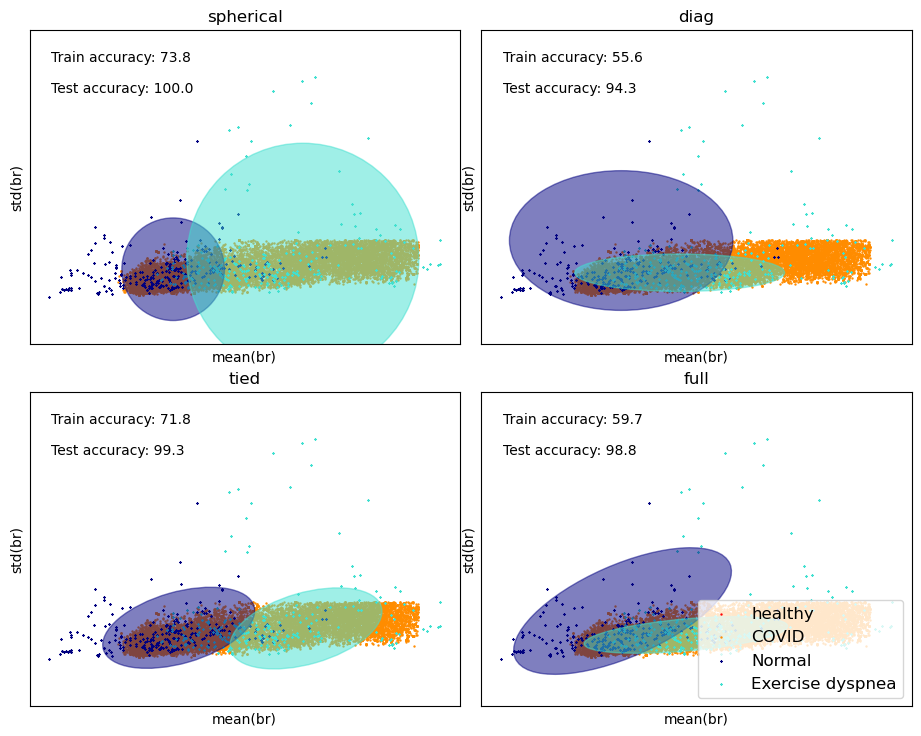

In [53]:

# colors = ["navy", "turquoise", "darkorange"]
colors_test = ["red", "darkorange"]
colors = ["navy", "turquoise"]
l_names=['Normal','Exercise dyspnea']
l_names_test=['healthy','COVID']

feat_num=[1,2]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")




# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2*1.5, 6*1.2))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )
    


    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    for n, color in enumerate(colors_test):
        print(n)
        data = X_test[y_test == n]
        plt.scatter(data[:, feat_num[0]-1],data[:, feat_num[1]-1],  s=0.5, color=color,label=l_names_test[n])

    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(
            data[:, feat_num[0]-1], data[:, feat_num[1]-1], s=0.8, marker="x",color=color, label=l_names[n]
        )
 
    # Plot the test data with crosses


    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)
   
    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)
    
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(FeatureName[feat_num[0]-1])
    plt.ylabel(FeatureName[feat_num[1]-1])
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()


In [41]:
print(FeatureName[feat_num[0]-1])
h=FeatureName[feat_num[0]-1]

mean(br)
